In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import normaltest
import numpy as np
import matplotlib
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [4]:
df = pd.read_csv('dataset/data1.csv')

In [5]:
df.head()

,Date,Season,Vụ nuôi,module_name,ao,Ngày thả,Time,Nhiệt độ,pH,Độ mặn,...,Loại ao,Công nghệ nuôi,Giai doan,area,Giống tôm,Số lượng post,Tuổi tôm,Con/Kg,Mực nước,Thay nước (cm)
0,21/6/2022,Rainy,Vụ 1-2022,A1,D3N6,69,8,29.53,7.33,21.53,...,Rectangle,Nuôi 1,NaN,1785.0,Vietuc,321750.0,78.00,55.00,75.0,0.0
1,20/6/2022,Rainy,Vụ 1-2022,A1,D3N6,68,8,29.65,7.40,21.34,...,Rectangle,Nuôi 1,NaN,1785.0,Vietuc,NaN,79.00,NaN,60.0,0.0
2,19/6/2022,Rainy,Vụ 1-2022,A1,D3N6,67,8,29.51,7.44,21.18,...,Rectangle,Nuôi 1,NaN,1785.0,Vietuc,NaN,76.00,NaN,61.0,0.0
3,18/6/2022,Rainy,Vụ 1-2022,A1,D3N6,66,8,30.51,7.50,21.54,...,Rectangle,Nuôi 1,NaN,1785.0,Vietuc,NaN,77.00,NaN,61.0,10.0
4,17/6/2022,Rainy,Vụ 1-2022,A1,D3N6,65,8,30.18,7.51,21.55,...,Rectangle,Nuôi 1,NaN,1785.0,Vietuc,NaN,74.00,NaN,60.0,0.0


In [6]:
df.columns

Index(['Date', 'Season', 'Vụ nuôi', 'module_name', 'ao', 'Ngày thả', 'Time',
       'Nhiệt độ', 'pH', 'Độ mặn', 'TDS', 'Độ đục', 'DO', 'Độ màu', 'Độ trong',
       'Độ kiềm', 'Độ cứng', 'Amoni', 'Nitrat', 'Nitrit', 'Phosphate (PO43-)',
       'Silica', 'Canxi', 'Kali', 'Magie', 'Nhiệt độ.1', 'pH.1', 'Độ mặn.1',
       'TDS.1', 'Độ đục.1', 'DO.1', 'Độ màu.1', 'Độ trong.1', 'Độ kiềm.1',
       'Độ cứng.1', 'Amoni.1', 'Nitrat.1', 'Nitrit.1', 'Phosphate (PO43-).1',
       'Silica.1', 'Canxi.1', 'Kali.1', 'Magie.1', 'F1', 'F2', 'F3', 'F4',
       'F5', 'WQI', 'Loại ao', 'Công nghệ nuôi', 'Giai doan', 'area',
       'Giống tôm', 'Số lượng post', 'Tuổi tôm', 'Con/Kg', 'Mực nước',
       'Thay nước (cm)'],
      dtype='object')

In [7]:
df.describe()

,Ngày thả,Time,Nhiệt độ,pH,Độ mặn,TDS,Độ đục,DO,Độ màu,Độ trong,...,F2,F3,F4,F5,WQI,Giai doan,area,Số lượng post,Mực nước,Thay nước (cm)
count,1179.000000,1179.0,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,...,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,0.0,1179.000000,5.000000e+01,1172.000000,1178.000000
mean,34.856658,8.0,28.571086,7.844029,28.580958,28.552188,48.467846,5.974563,271.248516,28.926972,...,0.166954,0.046050,0.053412,0.020418,0.655556,NaN,984.225615,4.441564e+05,90.035870,4.889643
std,21.041409,0.0,1.452776,0.328512,5.032944,5.777776,37.037271,0.659902,140.215915,9.612210,...,0.012088,0.016662,0.006121,0.003650,0.033364,NaN,553.989864,3.257615e+05,16.379774,9.946144
min,1.000000,8.0,24.810000,6.970000,15.010000,0.580000,0.910000,3.520000,14.000000,14.100000,...,0.109700,0.013800,0.023900,0.002300,0.520000,NaN,232.000000,5.525000e+04,0.000000,0.000000
25%,17.000000,8.0,27.540000,7.580000,25.125000,25.355000,24.145000,5.590000,155.000000,22.000000,...,0.159600,0.034300,0.050600,0.019200,0.640000,NaN,834.000000,1.969325e+05,80.000000,0.000000
50%,33.000000,8.0,28.760000,7.870000,28.610000,28.440000,38.160000,6.040000,257.000000,26.000000,...,0.167600,0.042400,0.053900,0.021000,0.660000,NaN,834.000000,4.034500e+05,92.000000,0.000000
75%,52.000000,8.0,29.570000,8.035000,31.315000,30.905000,63.710000,6.440000,365.000000,33.000000,...,0.175900,0.054800,0.056950,0.022400,0.680000,NaN,1785.000000,5.475000e+05,100.000000,5.000000
max,82.000000,8.0,38.910000,8.810000,38.830000,85.540000,386.270000,8.000000,1560.000000,72.000000,...,0.194400,0.107900,0.074900,0.044400,0.760000,NaN,1786.000000,1.200000e+06,150.000000,45.000000


In [8]:
# df.info()

In [9]:
# df.drop('Mua', axis='columns',inplace=True)

In [16]:
na = df.isnull().sum()
na[na>0]

Giai doan         1179
Số lượng post     1129
Con/Kg            1067
Mực nước             7
Thay nước (cm)       1
dtype: int64

In [13]:
physic_columns = ['Nhiệt độ', 'pH', 'Độ mặn', 'TDS', 'Độ đục', 'DO', 'Độ màu', 'Độ trong',
       'Độ kiềm', 'Độ cứng', 'Amoni', 'Nitrat', 'Nitrit', 'Phosphate (PO43-)',
       'Silica', 'Canxi', 'Kali', 'Magie', 'Tuổi tôm', 'Con/Kg', 'Mực nước',
       'Thay nước (cm)']

In [14]:
df1 = df[physic_columns].copy()

In [15]:
df1.head()

,Nhiệt độ,pH,Độ mặn,TDS,Độ đục,DO,Độ màu,Độ trong,Độ kiềm,Độ cứng,...,Nitrit,Phosphate (PO43-),Silica,Canxi,Kali,Magie,Tuổi tôm,Con/Kg,Mực nước,Thay nước (cm)
0,29.53,7.33,21.53,21.77,39.48,4.54,273.0,19.0,130.0,3500.0,...,0.73,7.6,1.84,488.50,370.50,788.00,78.00,55.00,75.0,0.0
1,29.65,7.40,21.34,21.77,38.12,5.02,435.0,19.0,119.0,3500.0,...,0.60,2.7,1.84,328.50,285.50,1017.25,79.00,NaN,60.0,0.0
2,29.51,7.44,21.18,21.63,37.85,5.16,440.0,19.0,118.0,4000.0,...,0.51,5.1,2.28,508.75,371.50,901.00,76.00,NaN,61.0,0.0
3,30.51,7.50,21.54,21.95,29.13,5.21,468.0,19.0,115.0,4000.0,...,0.30,1.2,2.96,454.50,353.50,690.00,77.00,NaN,61.0,10.0
4,30.18,7.51,21.55,21.96,25.62,5.07,438.0,20.0,112.0,3500.0,...,0.45,8.4,9.10,458.75,329.75,806.00,74.00,NaN,60.0,0.0


In [17]:
na = df1.isnull().sum()
na[na>0]

Con/Kg            1067
Mực nước             7
Thay nước (cm)       1
dtype: int64

In [18]:
# df1.info()

In [19]:
# df1.isna().sum()

In [303]:
# find outlier (which more than 3 times of standard deviation)
np.where(stats.zscore(df["Magie"])>3)

(array([413, 415, 420, 422, 423, 424, 447, 448, 453, 455, 456, 458, 461,
        478, 480, 481, 483, 487, 491, 493, 497, 502, 505, 549, 551, 552,
        558, 564, 567, 572, 576, 583, 611], dtype=int64),)

In [334]:
df['Magie'].skew()

1.6171387613069546

In [289]:
# fig = plt.figure()
  
# # Plot between -10 and 10 with .001 steps. 
# x_axis = np.arange(-5, 2000, 1 )
  
# ax = sns.lineplot(x=x_axis, 
#                   y=stats.norm.pdf(x_axis, mgMean, mgStd),
#                   color=matplotlib.cm.Pastel2.colors[1]) 

# sns.histplot(df1["Magie"],
#              color='lightskyblue',
#              stat='density',
#              ax=ax)
# sns.kdeplot(df1["Magie"],color='navy')
# plt.show() 

In [96]:
def normal_test(data: pd.DataFrame, col: str):
    # Get statistic of collumn
    mean = data[col].mean()
    std = data[col].std()
    skew = data[col].skew()
    print(f"{skew=}")
    median = data[col].median()
    
    x = np.arange(data[col].min(),
                  data[col].max(),
                  (data[col].max()-data[col].min())/2000)
    
#     ks_ret = stats.ks_1samp(data[col],stats.norm.cdf,args=(mean,std))
    ks_ret = stats.ks_1samp(data[col],stats.skewnorm.cdf,args=(skew,mean,std))


    print(f"{ks_ret.pvalue=}")
    fig = plt.figure()
    sns.histplot(data[col],
                 stat='density',
                 color="#B1E7FF")
    sns.kdeplot(data[col],
                color='navy',
                label=col)
    sns.lineplot(x=x,
                 y=stats.skewnorm.pdf(x,a=skew,loc=mean,scale=std),
                 color='red',
                 label='skew normal distribution')

#     plt.axvline(x=median)
    ax = plt.gca()
    ax.legend()
    plt.show()
    

In [127]:
def normal_test1(data: pd.DataFrame, col: str):
    # Use standard scaler to turn data into mean = 0, and std = 1
    sc = StandardScaler()
    x= np.array(data[col]).reshape(-1,1)
    print(f"{x.shape=}")
    x = sc.fit_transform(x)
    print(f"{x.shape=}")
    x=np.squeeze(x)
    mode = stats.mode(x).mode
    print(f"{mode=}")
    std = stats.tstd(x)
    
    # Get collum skewness
    skew = stats.skew(x,bias=False)
    print(f"{skew=}")
    
    # Reference distribution, skew normal 
    ks_ret = stats.ks_1samp(x,stats.skewnorm.cdf,args=(skew,0,1))
    
    print(f"{ks_ret.pvalue=}")
    fig = plt.figure()
    sns.histplot(x,
                 stat='density',
                 color="#B1E7FF")
    sns.kdeplot(x,
                color='navy')
    
    sns.lineplot(x=np.arange(-4,4,0.005),
                 y=stats.skewnorm.pdf(np.arange(-4,4,0.005),
                                      a=skew,
                                      loc=0,
                                      scale=1),
                 color='#218B63')

#     plt.show()

x.shape=(1179, 1)
x.shape=(1179, 1)
mode=-0.7044079642657111
skew=1.617138761306955
ks_ret.pvalue=9.43003643712513e-231


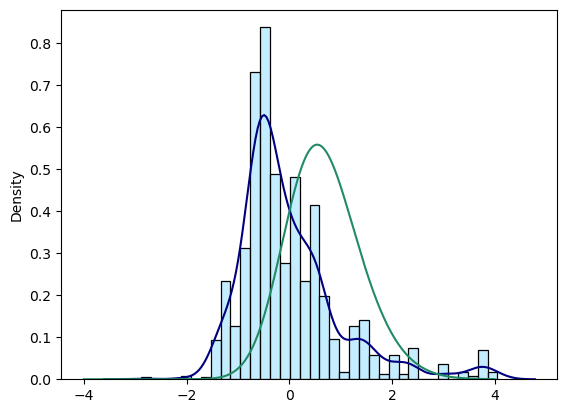

In [128]:
normal_test1(df1,'Magie')

x.shape=(1179, 1)
x.shape=(1179, 1)
mode=-0.6363534559833
skew=0.5465848189358948
ks_ret.pvalue=5.129297884773525e-65


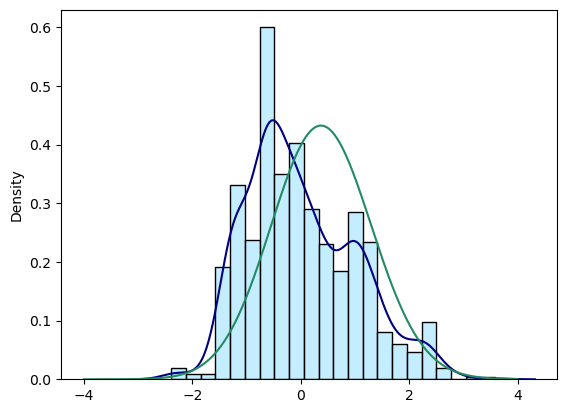

In [129]:
normal_test1(df1,'Canxi')

x.shape=(1179, 1)
x.shape=(1179, 1)
mode=-0.83721115623932
skew=1.1744986343909072
ks_ret.pvalue=3.1834716351265053e-189


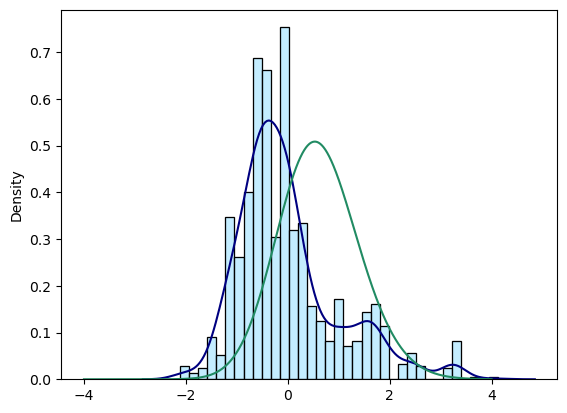

In [130]:
normal_test1(df1,'Kali')

x.shape=(1179, 1)
x.shape=(1179, 1)
mode=-0.9569941315358519
skew=1.6543829503932677
ks_ret.pvalue=5.193935493534971e-182


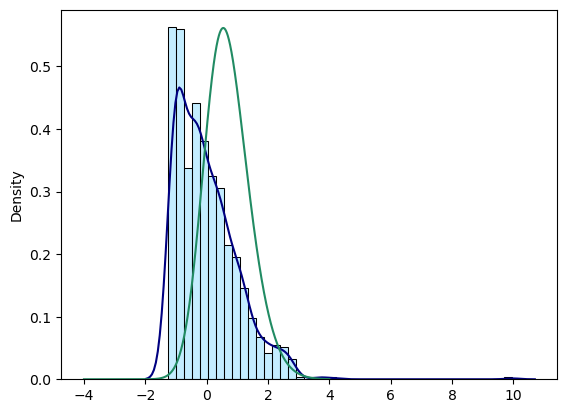

In [131]:
normal_test1(df1,'Silica')

In [49]:
Mg_normtest = normaltest(df1['Magie'])

In [50]:
Mg_normtest

NormaltestResult(statistic=373.4873172957956, pvalue=7.911512503637602e-82)

In [51]:
kstest_mg = stats.ks_1samp(df1['Amoni'].tolist(),stats.norm.pdf)
print(kstest_mg.statistic)
print(kstest_mg.pvalue)

1.0
0.0


In [86]:
stats.skew(stats.skewnorm.pdf(np.arange(-4,4,0.5),
                              a =-1.5,
                              loc=0,
                              scale=1))

1.246331646522138

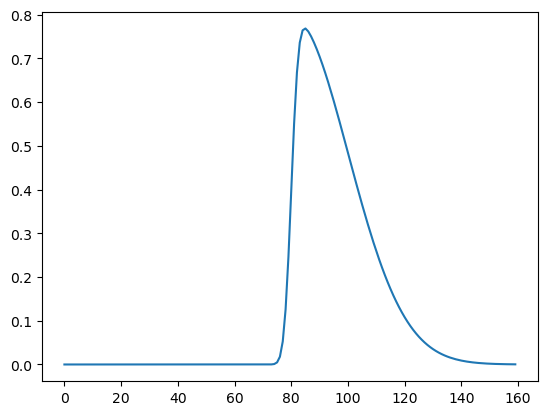

In [95]:
plt.plot(stats.skewnorm.pdf(np.arange(-4,4,0.05),
                              a =10,
                              loc=0,
                              scale=1))

In [90]:
df1['Magie'].skew()

1.6171387613069546

In [133]:
n = len(df['Magie'])
chi0 = 

In [134]:
n

1179

corr = df1.corr()

<Axes: >

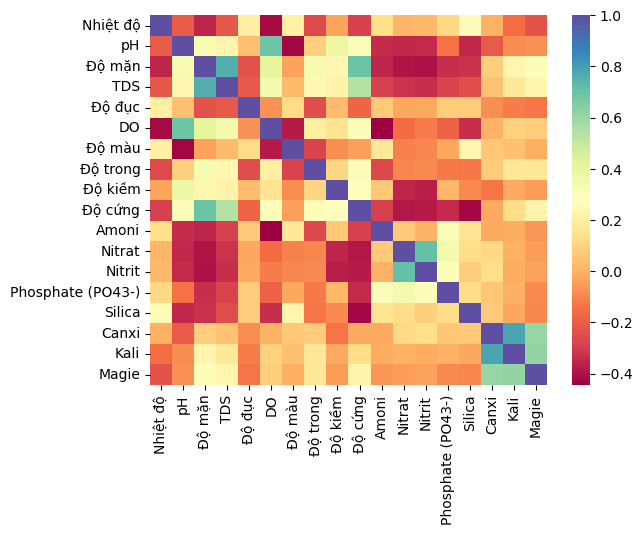

In [56]:
sns.heatmap(corr,cmap='Spectral')

In [57]:
corr1 = df1.corr(method='spearman')

<Axes: >

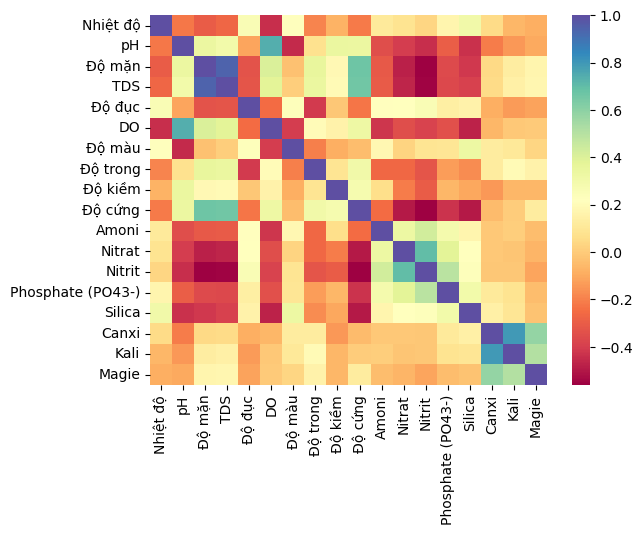

In [58]:
sns.heatmap(corr1,cmap='Spectral')

NormaltestResult(statistic=373.4873172957956, pvalue=7.911512503637602e-82)